# Перевірка `src.visualize` на проміжних результатах

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from src.utils import (
    PATH_PROCESSED, 
    merge_all, 
    weighted_average
)
from src.visualize import (
    FIGURES,
    draw_multiple_spiders,
    draw_profile_gen,
    draw_profile_det,
    draw_boxplot_dist,
    draw_rankings
)

In [2]:
dict_weights = {
    'P1':2,
    'P2':2,
    'P3':0.5,
    'P4':1,
    'P5':1,
    'P6':2,
    'P7':1,
    'P8':0.5
}

In [3]:
data = [pd.read_csv(f) for f in PATH_PROCESSED.rglob("*.csv") if "_raw" not in f.parts[-1]]
df = merge_all(data, on="region")
df.fillna(0, inplace=True)
df = df.loc[df["region"].notnull() & ~df["region"].isin(["м.Київ", 0])].reset_index(drop=True)
cols = df.loc[:, df.columns.str.contains("P")].columns
df["I"] = weighted_average(df, cols, dict_weights)

In [4]:
df

,region,p1_01,p1_02,p1_03,p1_04,P1,p2_01,p2_02,p2_03,p2_04,...,P6,p7_01,p7_02,p7_06,p7_07,p7_03,P7,p8_04,P8,I
0,Вінницька,0.000000,0.0,0.726933,0.465472,2.981013,0.665446,0.250456,0.396274,0.206744,...,5.752881,0.328904,0.437409,0.004341,0.118780,0.987397,3.753661,0.805673,8.056734,43.341232
1,Волинська,0.386997,0.0,0.654894,0.898782,4.851683,0.427766,0.061505,0.572223,0.144557,...,5.155752,0.067247,0.418038,0.004744,0.003852,0.949967,2.887695,0.794885,7.948854,46.567747
2,Дніпропетровська,0.389171,0.0,0.653475,0.610856,4.133756,0.981591,1.000000,0.357024,1.000000,...,5.146644,0.120130,0.123518,0.001164,0.816693,0.905594,3.934198,0.926550,9.265500,49.596337
3,Донецька,0.039965,0.0,0.622632,0.726443,3.472601,0.232921,0.369265,0.048685,0.836695,...,4.298877,0.122811,1.000000,0.004902,0.845265,0.897035,5.740027,0.959906,9.599057,45.618240
4,Житомирська,0.017184,0.0,0.667463,0.814445,3.747733,0.569364,0.136291,0.233780,0.205455,...,5.817826,0.008852,0.448698,0.003964,0.016372,0.955882,2.867537,0.873727,8.737272,46.600258
5,Закарпатська,0.000000,0.0,0.699642,0.812536,3.780445,0.269235,0.055838,0.141320,0.148979,...,5.157281,0.012029,0.311199,0.004248,0.154093,0.861286,2.685710,0.927796,9.277955,40.916334
6,Запорізька,0.609396,0.0,0.602185,0.639124,4.626764,0.826454,0.360413,0.276784,0.187785,...,5.271572,0.435616,0.784071,0.005515,0.171108,0.910013,4.612646,0.857275,8.572751,44.035255
7,Івано-Франківська,0.162198,0.0,0.677687,0.768023,4.019772,0.372210,0.104601,0.596028,0.145594,...,5.238485,0.067085,0.338067,0.005134,0.074799,0.880372,2.730915,0.709349,7.093486,44.133185
8,Київська,0.000000,0.0,0.681545,0.546132,3.069190,1.000000,0.491515,0.655043,0.731713,...,5.179914,1.000000,0.000000,0.000000,0.019583,0.922730,0.000000,1.000000,10.000000,43.374426
9,Кіровоградська,0.000000,0.0,0.469955,0.880617,3.376429,0.675666,0.114556,0.474531,0.011731,...,5.004937,0.095861,0.515756,0.008176,0.143820,0.932395,3.392018,0.906864,9.068642,40.232602


In [5]:
cols

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8'], dtype='object')

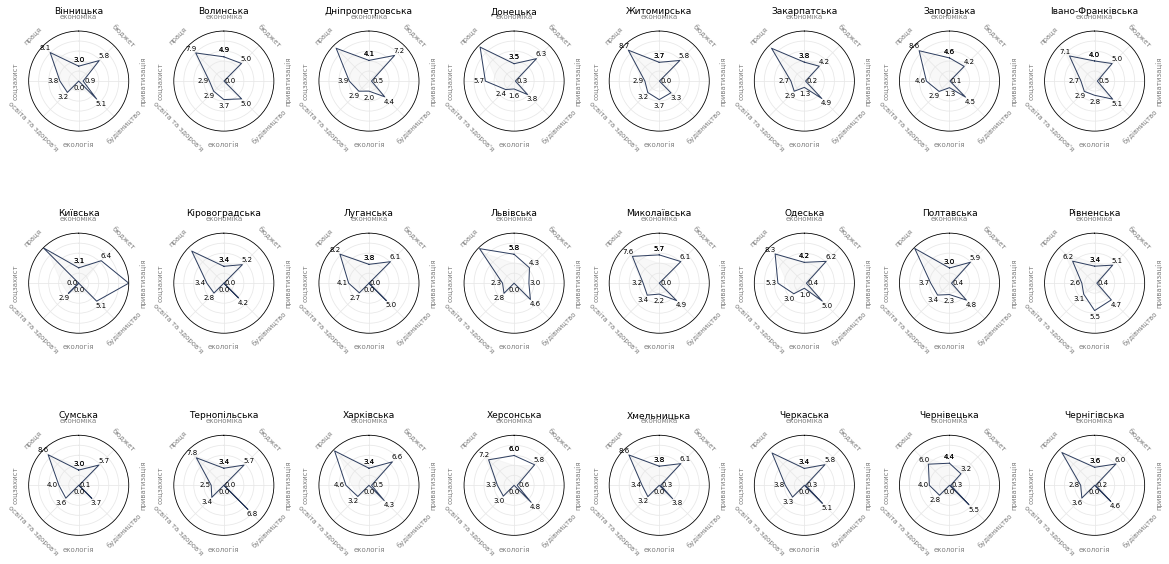

In [6]:
draw_multiple_spiders(df, cols)

c:\github\index-2020-3\src\visualize.py:132: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(x_labels)


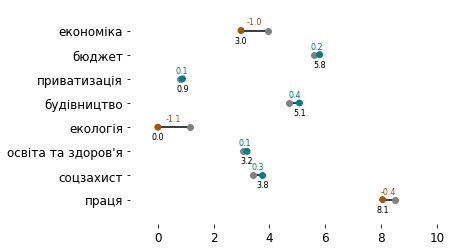

In [7]:
draw_profile_gen(df, cols, 0, save=True)

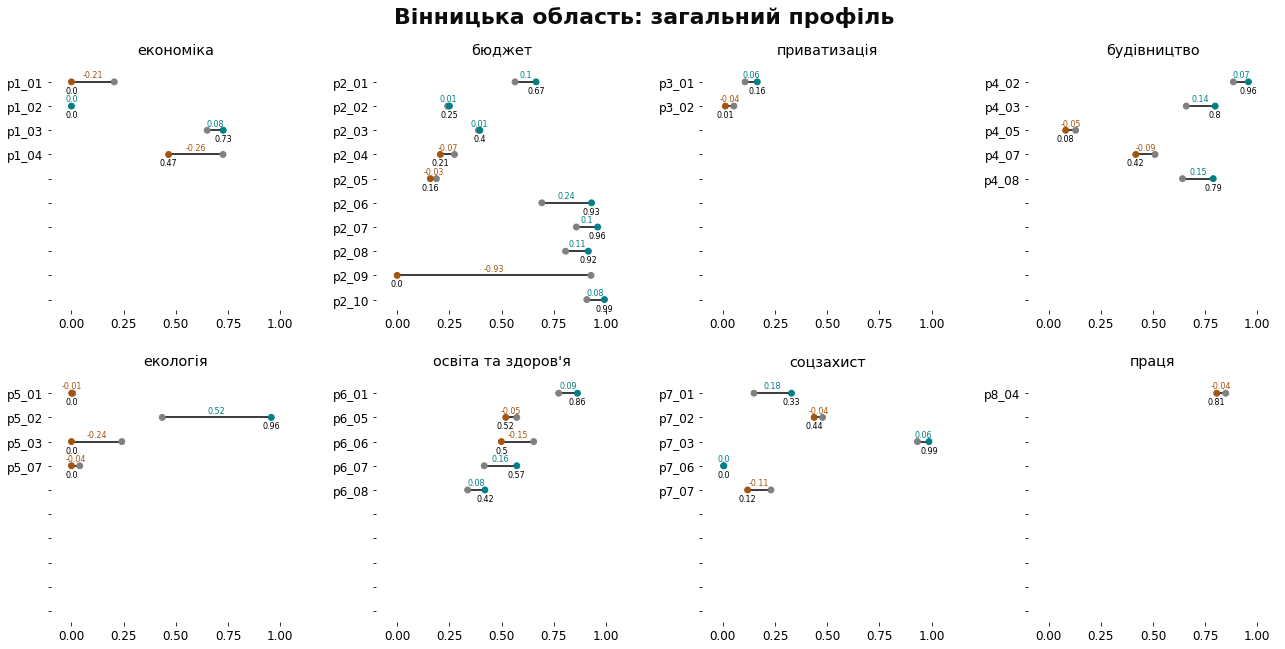

In [8]:
draw_profile_det(df, cols, 0)

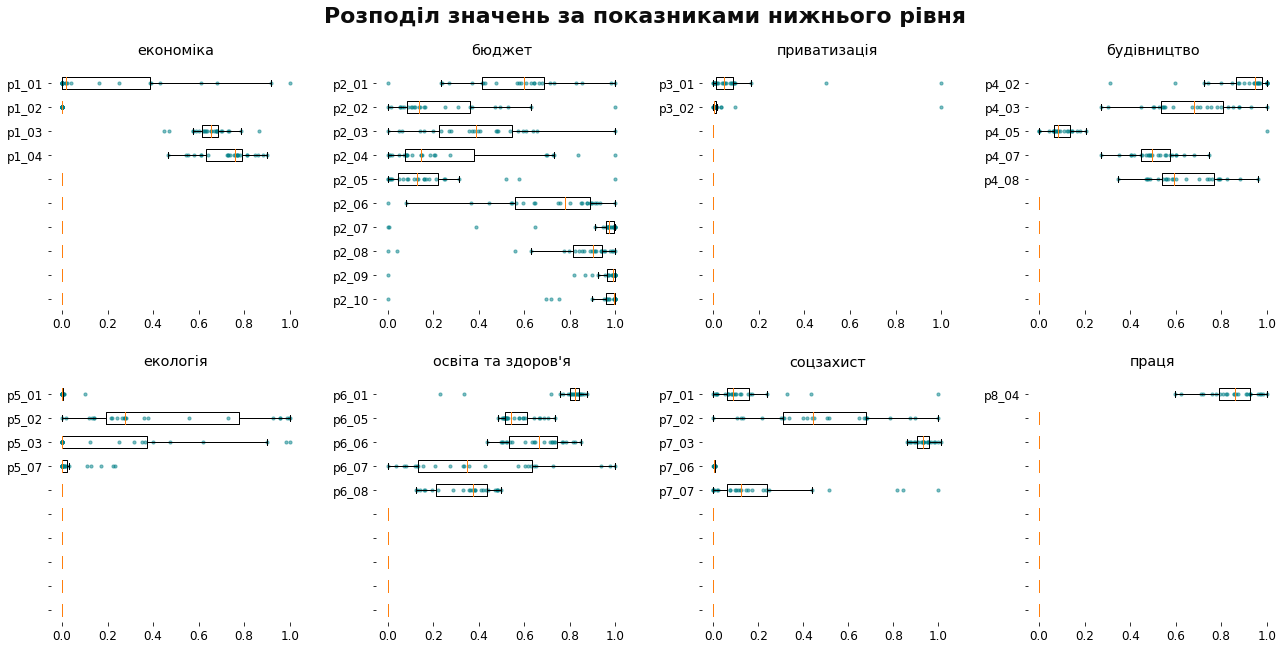

In [9]:
draw_boxplot_dist(df, cols, save=True)

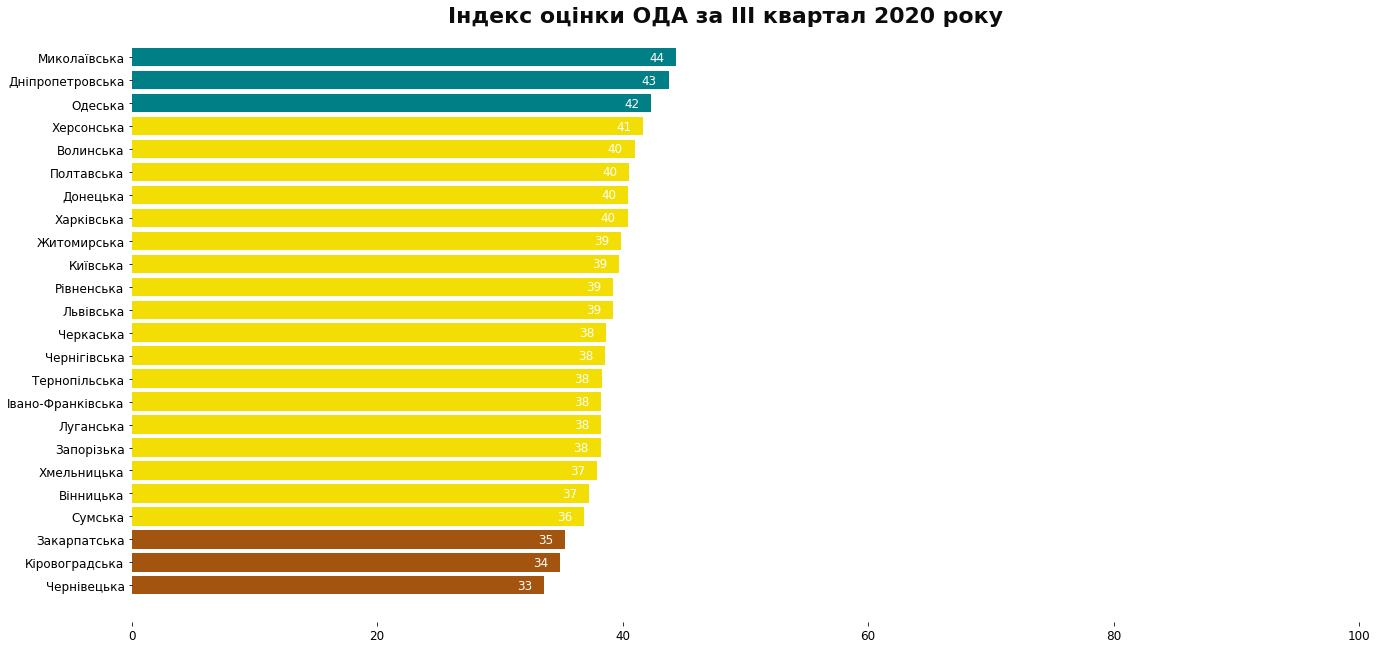

In [10]:
draw_rankings(df)

---

# Тест
## `ranking` + зміна відносно минулого кварталу
## !!! на випадкових даних!!!

In [6]:
viz = df.loc[:, ["region", "I"]]
viz["I-1"] = np.random.uniform(-2, 2, len(viz))
viz.sort_values("I", inplace=True)

colors = ['#a3550f','#f2dd05','#007f86']
viz["col"] = [colors[0] for r in range(3)] + [colors[1] for y in range(viz.shape[0]-6)] + [colors[2] for g in range(3)]
viz["scatter_col"] = np.where(viz["I-1"]<0, "#a3550f", "#007f86")

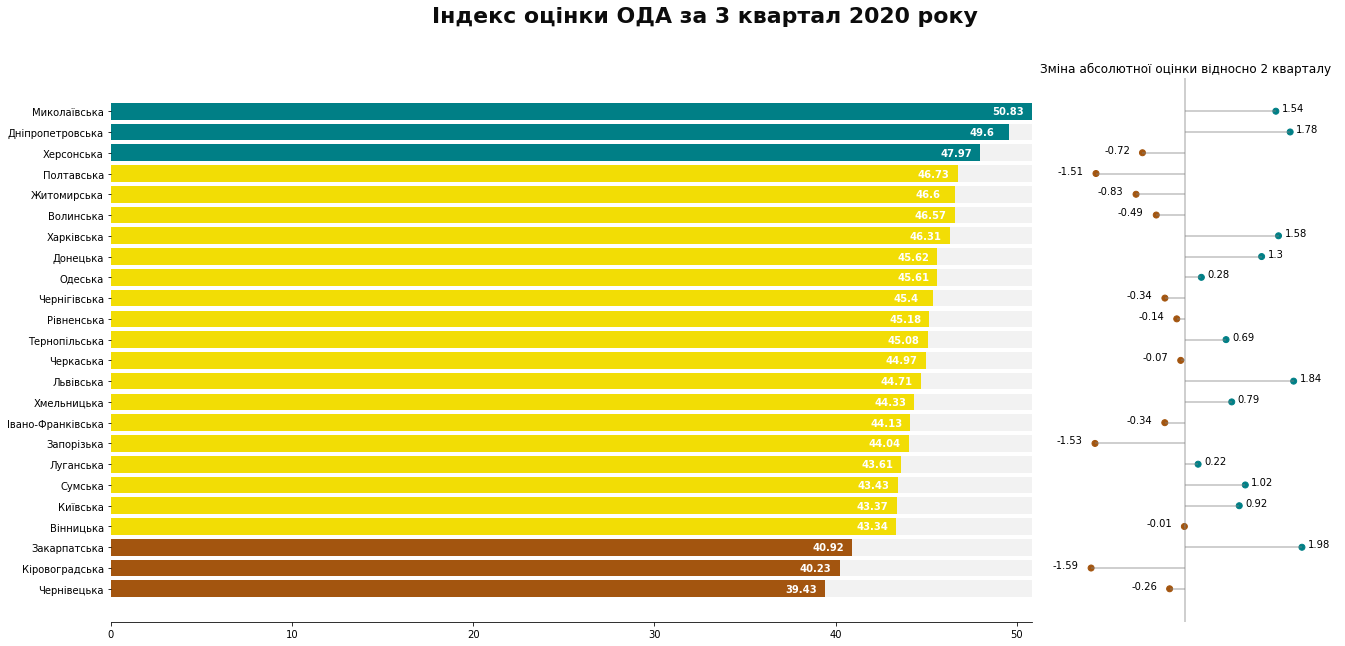

In [10]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, 
    ncols=2, 
    figsize=(22, 10), 
    sharey=True, 
    gridspec_kw={
        "width_ratios": [3,1],
        "wspace": 0
    }
)

ax1.spines['top'].set_color('none')
ax1.spines['left'].set_color('none')
ax1.spines['right'].set_color('none')

ax1.barh(viz["region"], viz["I"], color=viz["col"])
ax1.barh(viz["region"], viz["I"].max() - viz["I"], left=viz["I"], color="gray", alpha=0.1)
for i in viz.index:
    ax1.annotate(
        viz.loc[i, "I"].round(2),
        xy=(viz.loc[i, "I"]-2.2, viz.loc[i, "region"]), 
        c='white', 
        va='center',
        weight="bold",
    )
    
ax2.hlines(viz["region"], 0, viz["I-1"], color="gray", alpha=0.5)
ax2.scatter(viz["I-1"], viz["region"], color=viz["scatter_col"])
for i in viz.index:
    cond = viz.loc[i, "I-1"] - 0.65 if viz.loc[i, "I-1"] < 0 else viz.loc[i, "I-1"] + 0.1
    ax2.annotate(
        viz.loc[i, "I-1"].round(2), xy=(cond, viz.loc[i, "region"])
    )
ax2.set_xlim(-2.6, 2.6)
ax2.axes.set_axis_off()
ax2.axvline(0, color="gray", alpha=0.5)

ax2.set_title("Зміна абсолютної оцінки відносно 2 кварталу", loc="center")
fig.suptitle(f'Індекс оцінки ОДА за 3 квартал 2020 року', fontsize=22, weight='bold', alpha=0.95)

plt.savefig(
    FIGURES / "ranking_with_dynamics_sample.jpeg",
    dpi=300, bbox_inches='tight', pad_inches=0.3,
    transparent = False
)